In [8]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 출력한 내용 청소
from IPython.display import clear_output

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

### 경사하강법
- 앞서 살펴본 오차 계산법을 통하면 오차를 구할 수 있다.
- 최적의 기울기 보다 기울기가 크거나 작으면 오차는 커진다.
- 최적의 y절편보다 y절편이 크거나 작으면 오차는 커진다.
- 이에 오차와 기울기, 오차와 y절편간의 관계는 2차 함수 관계가 된다.
- 이를 이용해 2차함수를 통한 오차그래프를 만들고 그래프의 접선의 기울기를 구해 접선의 기울기가 최소가 되는 지점을 찾게 된다.
- 이 때, 접선의 기울기를 구하기 위해 미분을 사용한다.

In [16]:
# 학습할 데이터
공부한시간 = [2, 4, 6, 8]
성적 = [81, 93, 91, 97]

In [17]:
# 계산의 용이성을 위해 ndarray를 생성한다.
x_data = np.array(공부한시간)
y_data = np.array(성적)

In [18]:
# 임의의 기울기와 절편
기울기 = 0
절편 = 0

In [19]:
# 학습율
학습율 = 0.001

In [20]:
# 학습 횟수
epochs = 50000

epoch : 49900, 기울기 : 2.300001199228347, 절편 : 78.99999284351809


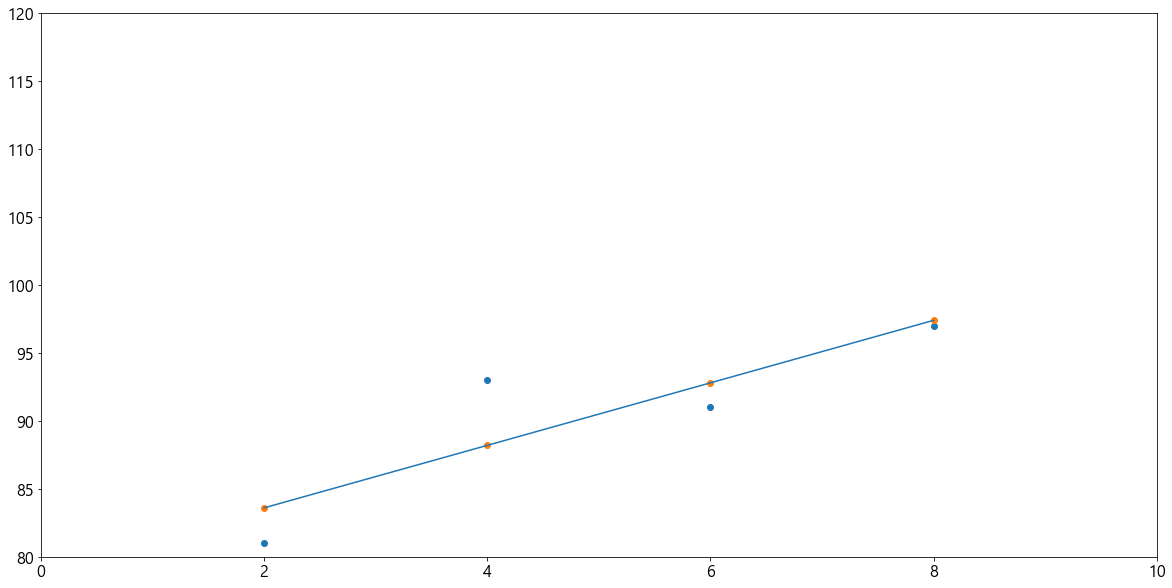

In [21]:
# 학습한다.
# 학습 횟수 만큼 반복한다.
for i in range(epochs):
    # 현재의 기울기와 y절편을 이용하여 예측 결과를 가져온다.
    y_pred = 기울기 * x_data + 절편
    # print(y_pred)
    
    # 오차를 구한다.
    error = y_data - y_pred
    # print(error)
    
    # 기울기를 미분한다.
    a_diff = -(2 / len(x_data)) * sum(x_data * error)
    # 절편을 미분한다.
    b_diff = -(2 / len(x_data)) * sum(error)
    # print(a_diff)
    # print(b_diff)
    
    # 미분 값과 학습율을 이용해 기울기과 절편을 업데이트 한다.
    기울기 = 기울기 - (학습율 * a_diff)
    절편 = 절편 - (학습율 * b_diff)
    
    if i % 100 == 0 :
        clear_output(wait=True)
        
        print(f'epoch : {i}, 기울기 : {기울기}, 절편 : {절편}')
        
        plt.scatter(공부한시간, 성적, label='원본')
        plt.scatter(공부한시간, y_pred, label='예측')
        plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
        plt.xlim(0, 10)
        plt.ylim(80, 120)
        plt.show()

In [23]:
# 구한 기울기외 절편으로 예측값을 계산한다.
y_pred = 기울기 * x_data + 절편
y_pred

array([83.59999539, 88.19999771, 92.80000004, 97.40000236])

In [25]:
# 실제결과
성적

[81, 93, 91, 97]